In [72]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
orders = pd.read_csv('../data/Orders.csv')
returns = pd.read_csv('../data/Returns.csv')

In [195]:
orders.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority'],
      dtype='object')

Clean the Sales & Profit Columns by removing $ and thousand separators; then convert to float type.

In [29]:
orders['Sales']=[x.replace('$', '') for x in orders['Sales']]

In [30]:
orders['Sales']=[x.replace(',', '') for x in orders['Sales']]

In [31]:
orders['Profit']=[x.replace('$', '') for x in orders['Profit']]

In [25]:
orders['Profit']=[x.replace(',', '') for x in orders['Profit']]

In [39]:
orders['Sales'] = orders['Sales'].astype(float)
orders['Profit'] = orders['Profit'].astype(float)

Convert Order.Date to a Pandas Datetime variable

In [51]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])

In [58]:
orders.head(5)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


Group by & Aggregate Sales & Quantity Variables by Month & Category.

In [135]:
df = orders.groupby(['Order.Date','Category']).agg({'Sales':sum}).reset_index()

In [136]:
df['Month'] = [x.month for x in df['Order.Date']]

In [137]:
df['Year'] = [x.year for x in df['Order.Date']]

In [150]:
df1 = df.groupby(['Month','Category']).agg({'Sales':sum}).reset_index()

In [161]:
furnsales = df1[df1.Category=='Furniture'].Sales
officesales = df1[df1.Category=='Office Supplies'].Sales
techsales = df1[df1.Category=='Technology'].Sales

In [176]:
mth = list(range(1,13))
mth

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

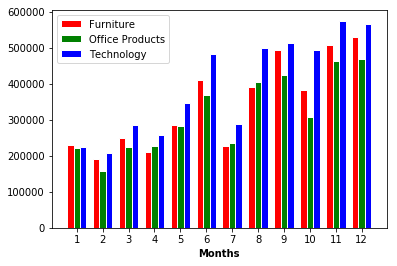

In [185]:
barwidth = 0.25
r1 = mth
r2 = [x + barwidth for x in r1]
r3 = [x + barwidth for x in r2]
plt.bar(r1,furnsales,color='red',width=barwidth,edgecolor='white',label='Furniture')
plt.bar(r2,officesales,color='green',width=barwidth,edgecolor='white',label='Office Products')
plt.bar(r3,techsales,color='blue',width=barwidth,edgecolor='white',label='Technology')

plt.xlabel('Months',fontweight='bold')
plt.xticks([r + barwidth for r in mth],mth)

plt.legend()
plt.show()

In [188]:
dfquant = orders.groupby(['Order.Date','Category']).agg({'Quantity':sum}).reset_index()
dfquant['Month'] = [x.month for x in dfquant['Order.Date']]
dfquant['Year'] = [x.year for x in dfquant['Order.Date']]

In [189]:
dfquant1 = dfquant.groupby(['Month','Category']).agg({'Quantity':sum}).reset_index()

In [191]:
furnquant = dfquant1[dfquant1.Category=='Furniture'].Quantity
officequant = dfquant1[dfquant1.Category=='Office Supplies'].Quantity
techquant = dfquant1[dfquant1.Category=='Technology'].Quantity

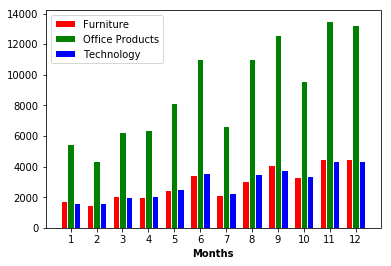

In [192]:
barwidth = 0.25
r1 = mth
r2 = [x + barwidth for x in r1]
r3 = [x + barwidth for x in r2]
plt.bar(r1,furnquant,color='red',width=barwidth,edgecolor='white',label='Furniture')
plt.bar(r2,officequant,color='green',width=barwidth,edgecolor='white',label='Office Products')
plt.bar(r3,techquant,color='blue',width=barwidth,edgecolor='white',label='Technology')

plt.xlabel('Months',fontweight='bold')
plt.xticks([r + barwidth for r in mth],mth)

plt.legend()
plt.show()

In [225]:
returns.head(5)

,Returned,Region
Order ID,,
CA-2012-SA20830140-41210,Yes,Central US
IN-2012-PB19210127-41259,Yes,Eastern Asia
CA-2012-SC20095140-41174,Yes,Central US
IN-2015-JH158207-42140,Yes,Oceania
IN-2014-LC168857-41747,Yes,Oceania


In [219]:
orders = orders.set_index(['Order.ID'])

In [220]:
returns = returns.set_index(['Order ID'])

In [214]:
orders['Order.ID'][0]

'CA-2014-AB10015140-41954'

In [215]:
returns['Order ID'][0]

'CA-2012-SA20830140-41210'

In [221]:
ordersreturns = pd.merge(orders,returns,left_index=True,right_index=True)

In [222]:
ordersreturns.head(5)

,Row.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Returned,Region_y
AE-2014-MY7380138-42004,48617,2014-12-31,1/3/15,Second Class,MY-7380138,Maribeth Yedwab,Corporate,NaN,Ras al Khaymah,Ra's Al Khaymah,...,Storage,"Tenex Folders, Blue",6.97,1,0.7,-8.60,1.75,High,Yes,Western Asia
AE-2014-MY7380138-42004,48618,2014-12-31,1/3/15,Second Class,MY-7380138,Maribeth Yedwab,Corporate,NaN,Ras al Khaymah,Ra's Al Khaymah,...,Supplies,"Stiletto Letter Opener, High Speed",16.67,2,0.7,-29.47,1.41,High,Yes,Western Asia
AG-2013-PO88653-41634,48662,2013-12-26,12/30/13,Standard Class,PO-88653,Patrick O'Donnell,Consumer,NaN,Guelma,Guelma,...,Copiers,"Hewlett Fax Machine, High-Speed",1908.72,6,0.0,190.80,169.70,High,Yes,North Africa
AG-2013-PO88653-41634,48661,2013-12-26,12/30/13,Standard Class,PO-88653,Patrick O'Donnell,Consumer,NaN,Guelma,Guelma,...,Art,"Sanford Markers, Easy-Erase",23.52,1,0.0,0.45,2.69,High,Yes,North Africa
AG-2014-CM21603-41755,42400,2014-04-26,5/1/14,Standard Class,CM-21603,Charles McCrossin,Consumer,NaN,Algiers,Alger,...,Supplies,"Kleencut Trimmer, Easy Grip",43.05,1,0.0,10.32,1.28,Medium,Yes,North Africa


Total Dollar Value of Returns

In [223]:
sum(ordersreturns.Sales)

525932.4100000008

Number of Unique Customers Who Returned Items, as measured by Unique Customer ID#

In [226]:
ordersreturns['Customer.ID'].nunique()

1061

Customers who returned 5x or more - value counts

In [230]:
customercounts = ordersreturns['Customer.ID'].value_counts() 

In [234]:
(customercounts[customercounts >4]).count()

80